## Build me a map, ChatGPT

#### Prompt 0:

Build me a sandwich map from this website:
57 Sandwiches That Define New York City

URL: https://www.nytimes.com/interactive/2024/dining/best-nyc-sandwiches.html  


#### Prompt 1:

I need you to the website located at the URL below and create me a sandwich map.

This is the URL:
https://www.nytimes.com/interactive/2024/dining/best-nyc-sandwiches.html


#### Prompt 2:

I need to parse the website at the url below and extract the following items:
- sandwich names 
- restaurant names
- addresses
- description
- images

This is the URL:
https://www.nytimes.com/interactive/2024/dining/best-nyc-sandwiches.html

#### ChatGPT Response:

"​I'm unable to access the specific content of the New York Times article at the provided URL."



## Write the Python code to scrape the website for me, ChatGPT

#### Prompt:

Write python code to parse HTML for the following items. Use beautiful soup.
- sandwich-names: class="sandwich-name" 
- restaurant-names: class="restaurant-name"
- meta-data: class="metadata svelte-1w102ch"
- description: class="g-text svelte-1w102ch"
- images: class="g-image svelte-z1ymna"
    - if the image URL contains "big_assets", then I want to ensure the URL also ends with a "-2.png"

## Extract Data from HTML


In [1]:
from bs4 import BeautifulSoup
import requests

# Fetch the webpage content
url = "https://www.nytimes.com/interactive/2024/dining/best-nyc-sandwiches.html"  # Replace with the actual URL
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

In [2]:
# soup

In [3]:
# soup.find_all(class_="sandwich-name")

#### Get `restaurants`, `sandwhich_names`, `meta_data`, `descriptions`

In [4]:
sandwich_names = []
restaurants = []
meta_data = []
descriptions = []

for tag in soup.find_all(class_="sandwich-name"):
    sandwich_names.append(tag.text.strip())

for tag in soup.find_all(class_="restaurant-name"):
    restaurants.append(tag.text.strip())

for tag in soup.find_all(class_="metadata svelte-1w102ch"):
    meta_data.append(tag.text.strip())

for tag in soup.find_all(class_="g-text svelte-1w102ch"):
    descriptions.append(tag.text.strip())


print length of every list

In [5]:
print("Length of restaurants:", len(restaurants))
print("Length of sandwich_names:", len(sandwich_names))
print("Length of meta_data:", len(meta_data))
print("Length of descriptions:", len(descriptions))

Length of restaurants: 57
Length of sandwich_names: 57
Length of meta_data: 56
Length of descriptions: 57


print first and last item for every list

In [6]:
print("First item of restaurants:", restaurants[0])
print("Last item of restaurants:", restaurants[-1])

print("First item of sandwich_names:", sandwich_names[0])
print("Last item of sandwich_names:", sandwich_names[-1])

print("First item ofmeta_data:",meta_data[0])
print("Last item ofmeta_data:",meta_data[-1])

print("First item of descriptions:", descriptions[0])
print("Last item of descriptions:", descriptions[-1])


First item of restaurants: Your nearest bodega
Last item of restaurants: Bonnie’s
First item of sandwich_names: Bacon, egg and cheese
Last item of sandwich_names: Char siu BK Rib
First item ofmeta_data: 178 East Seventh Street (Avenue B), $13, candbnyc.com
Last item ofmeta_data: 398 Manhattan Avenue (Frost Street), $28, bonniesbrooklyn.com
First item of descriptions: In New York City, there is no single bacon, egg and cheese to rule them all. Whichever B.E.C. you’re eating in that moment is the best one. You dig into one as a means to start your day or to battle a hangover or to simply fulfill a craving for the most satisfying combination of ingredients known to man. To love the B.E.C. is to exist on a continuum of past, present and future bacon, egg and cheeses — all of them just around the corner or down the block from wherever you are right now. NIKITA RICHARDSON
Last item of descriptions: This ingenious cross between the sticky-sweet dim sum staple char siu and a certain famous fas

## Images need special handling

*Prompt:*

I need to find all the images with this class:
find_all(class_="g-image")

- If the image URL does not contain "big_assets", store it in a list.
- if the image URL contains "big_assets" make sure it also ends with "-2.png" and store it in a list

I am trying to drop images that have "big_assests" in the URL but end with "-1.png"

In [7]:
# Find all the images
images = soup.find_all("img")


What is going on at the beginning of the list?

In [8]:
# images

In [9]:
# len(images)


In [10]:
# images[6:]

In [11]:
images_short = images[6:]

In [12]:
len(images_short)

66

We have 9 Sandwich Categories, each with an extra image

- Breakfast Bangers
- Hero Worship
- Veg In
- Pastrami City
- Gotham Greats
- ‘Let Me Get Uhh…’
- Diner Party
- Honorary New Yorkers
- Extremely Online

In [13]:
57 + 9

66

If URL contains 'big_assest' ensure it ends with '-2.png'

In [14]:
# Lists to store valid image URLs
valid_images = []

for img in images_short:
    img_url = img.get("src")  # Get the image URL
    if img_url:
        if "big_assets" in img_url:
            if img_url.endswith("-2.png"):  # Keep only if it ends with "-2.png"
                valid_images.append(img_url)
        else:
            valid_images.append(img_url)  # Keep all other images

In [15]:
print("First image:", valid_images[0])
print("Last image:", valid_images[-1])

First image: https://static01.nytimes.com/newsgraphics/2024-05-21-sandwich/_big_assets/breakfast-2.png
Last image: https://static01.nytimes.com/newsgraphics/2024-05-21-sandwich/_images/onlyny1-@@-300.webp


#### Variables we have created so far

restaurants  
sandwich_names  
meta_data  
descriptions  
valid_images  

In [16]:
print("Length of meta_data:", len(meta_data))
print("Length of descriptions:", len(descriptions))
print("Length of restaurants:", len(restaurants))
print("Length of sandwich_names:", len(sandwich_names))
print("Length of valid_images:", len(valid_images))

Length of meta_data: 56
Length of descriptions: 57
Length of restaurants: 57
Length of sandwich_names: 57
Length of valid_images: 57


In [17]:
print("First element of meta_data:", meta_data[0])
print("First element of descriptions:", descriptions[0])
print("First element of restaurants:", restaurants[0])
print("First element of sandwich_names:", sandwich_names[0])
print("First element of valid_images:", valid_images[0])

First element of meta_data: 178 East Seventh Street (Avenue B), $13, candbnyc.com
First element of descriptions: In New York City, there is no single bacon, egg and cheese to rule them all. Whichever B.E.C. you’re eating in that moment is the best one. You dig into one as a means to start your day or to battle a hangover or to simply fulfill a craving for the most satisfying combination of ingredients known to man. To love the B.E.C. is to exist on a continuum of past, present and future bacon, egg and cheeses — all of them just around the corner or down the block from wherever you are right now. NIKITA RICHARDSON
First element of restaurants: Your nearest bodega
First element of sandwich_names: Bacon, egg and cheese
First element of valid_images: https://static01.nytimes.com/newsgraphics/2024-05-21-sandwich/_big_assets/breakfast-2.png


Remove bodega info :(

In [18]:
descriptions.pop(0)
restaurants.pop(0)
sandwich_names.pop(0)
valid_images.pop(0)

'https://static01.nytimes.com/newsgraphics/2024-05-21-sandwich/_big_assets/breakfast-2.png'

In [19]:
print("Length of meta_data:", len(meta_data))
print("Length of descriptions:", len(descriptions))
print("Length of restaurants:", len(restaurants))
print("Length of sandwich_names:", len(sandwich_names))
print("Length of valid_images:", len(valid_images))

Length of meta_data: 56
Length of descriptions: 56
Length of restaurants: 56
Length of sandwich_names: 56
Length of valid_images: 56


In [20]:
print("First element of meta_data:", meta_data[0])
print("First element of descriptions:", descriptions[0])
print("First element of restaurants:", restaurants[0])
print("First element of sandwich_names:", sandwich_names[0])
print("First element of valid_images:", valid_images[0])

First element of meta_data: 178 East Seventh Street (Avenue B), $13, candbnyc.com
First element of descriptions: Many people wouldn’t guess that C & B, by the looks of it, serves some of the finest sandwiches in the city. Ali Sahin’s tiny cafe has been located for nearly a decade on the south side of Tompkins Square Park in the East Village, serving breakfast sandwiches that exemplify why New Yorkers love breakfast sandwiches: they’re simple as can be, but every component is on point. Lining up for a weekend breakfast sandwich there feels a little like being at a model casting — one wonders if the name is a play on “see and be seen” — but ordering well is a great equalizer: a fat, rich chorizo patty straight off the griddle and wobbly scrambled eggs, all piled high on an housemade roll to soak up the sausage’s spiced fat. BECKY HUGHES
First element of restaurants: C&B
First element of sandwich_names: Chorizo egg sandwich
First element of valid_images: https://static01.nytimes.com/newsg

In [21]:
print("Last element of meta_data:", meta_data[-1])
print("Last element of descriptions:", descriptions[-1])
print("Last element of restaurants:", restaurants[-1])
print("Last element of sandwich_names:", sandwich_names[-1])
print("Last element of valid_images:", valid_images[-1])

Last element of meta_data: 398 Manhattan Avenue (Frost Street), $28, bonniesbrooklyn.com
Last element of descriptions: This ingenious cross between the sticky-sweet dim sum staple char siu and a certain famous fast-food sandwich received so much glowing attention when it landed at this Cantonese American restaurant in Williamsburg that McDonald’s sent a cease-and-desist letter to the chef Calvin Eng in November. Now, the dish formerly known as the Char Siu McRib is the char siu BK Rib, but it remains the top seller, and for good reason. It takes three days to marinate and steam the ribs, which are deboned and paired with a sesame milk bun, a smear of Chinese hot mustard, sliced onion and bread-and-butter pickles. The pork melts into the bun, and the pickles and spicy mustard bring tangy, sharp relief. PRIYA KRISHNA
Last element of restaurants: Bonnie’s
Last element of sandwich_names: Char siu BK Rib
Last element of valid_images: https://static01.nytimes.com/newsgraphics/2024-05-21-sand

## Turn the lists into a dataframe

In [22]:
import pandas as pd

data = {
    'restaurant': restaurants,
    'sandwich_name': sandwich_names,
    'meta_data': meta_data,
    'description': descriptions,
    'image_url': valid_images
}

df = pd.DataFrame(data)


#### Is this tidy data?

In [23]:
df.head()

,restaurant,sandwich_name,meta_data,description,image_url
0,C&B,Chorizo egg sandwich,"178 East Seventh Street (Avenue B), $13, candb...","Many people wouldn’t guess that C & B, by the ...",https://static01.nytimes.com/newsgraphics/2024...
1,Radio Bakery,Smoked salmon sandwich,"135 India Street (Manhattan Avenue), $15, radi...",New York is no stranger to smoked salmon — we’...,https://static01.nytimes.com/newsgraphics/2024...
2,Edith’s,BEC&L,"495 Lorimer Street (Powers Street), $14, edith...",Elyssa Heller is a pandemic pop-up success sto...,https://static01.nytimes.com/newsgraphics/2024...
3,Daily Provisions,The Lumberjack,"Multiple locations, $12, dailyprovisionsnyc.com",So many portmanteau foods can go horribly wron...,https://static01.nytimes.com/newsgraphics/2024...
4,Shelsky’s Brooklyn Bagels,The Newhouse,"453 Fourth Avenue (10th Street), $18, shelskys...",Bialys and sable can seem like afterthoughts o...,https://static01.nytimes.com/newsgraphics/2024...


In [24]:
df['sandwich_name'].nunique()

56

In [25]:
df.shape

(56, 5)

## From `meta_data`, I need to parse out `price` and `website`

In [26]:
df['meta_data'][0]

'178 East Seventh Street (Avenue B), $13, candbnyc.com'

ChatGPT: I want to draw a random row

In [27]:
import random
random_index = random.randint(0, len(df) - 1)

df['meta_data'][random_index]


'552 West 235th Street (Johnson Avenue), $26, liebmansdeli.com'

In [28]:
df['meta_data'][6]

'Kennedy International Airport, Terminal 4, $5, shakeshack.com/location/jfk-airport-nyc'

#### Split the string by commas and get the last element

In [29]:
df['meta_data'].str.split(',')[0]

['178 East Seventh Street (Avenue B)', ' $13', ' candbnyc.com']

In [30]:
df['meta_data'].str.split(',')[6]

['Kennedy International Airport',
 ' Terminal 4',
 ' $5',
 ' shakeshack.com/location/jfk-airport-nyc']

In [31]:
df['website'] = df['meta_data'].str.split(',').str[-1].str.strip()

In [32]:
df['website'][0]

'candbnyc.com'

In [33]:
df['website'][3]

'dailyprovisionsnyc.com'

In [34]:
df['website'][6]

'shakeshack.com/location/jfk-airport-nyc'

#### Split the string by commas and get the first element

In [35]:

df['address'] = df['meta_data'].str.split(',').str[0]

In [36]:
df['address'][0]

'178 East Seventh Street (Avenue B)'

In [37]:
df['address'][3]

'Multiple locations'

In [38]:
df['address'][6]

'Kennedy International Airport'

#### Split the string by commas and get the second element, remove '$'

In [39]:
df['meta_data'][0]

'178 East Seventh Street (Avenue B), $13, candbnyc.com'

In [40]:
df['price'] = df['meta_data'].str.split(',').str[1]

In [41]:
df['price'][0]

' $13'

In [42]:
df['price'][6]

' Terminal 4'

*Prompt*

- in the column df['meta_data'], the price starts with a "$"
- grab the integer following the "$"
- and store it in a new column called 'price'

In [43]:
import re

# The pattern r'\$(\d+)' looks for a dollar sign ($) followed by one or more digits (\d+)
# .group(1): Extracts the first capturing group from the match, which corresponds to the digits following the dollar sign.
# int(...): Converts the extracted string of digits into an integer.

df['price'] = df['meta_data'].apply(lambda x: int(re.search(r'\$(\d+)', x).group(1)))


In [44]:
df['price'][6]

np.int64(5)

In [45]:
round(df['price'].mean(), 2)

np.float64(15.93)

In [46]:
# df

In [47]:
# pip install matplotlib

In [48]:
# df['price'].value_counts()

<Axes: xlabel='price'>

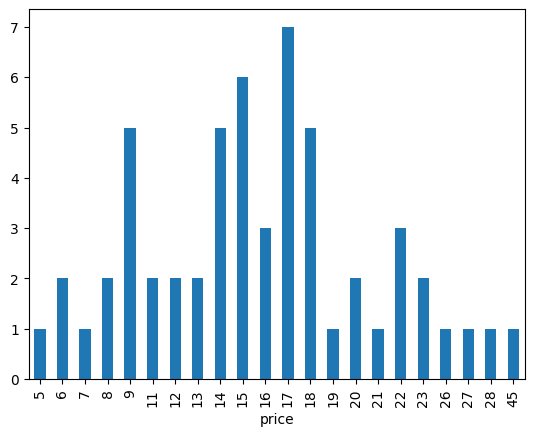

In [49]:
df['price'].value_counts().sort_index().plot(kind='bar')


## GEOCODE

*Prompt*  

I want to geo code addresses using the google maps api. The addresses are stored in the column 'address'. I want to send the api the addresses and then get the lat and long as new columns in my df. I also want to return the status of the api call and the formatted address from the api. 

NOTE: We know we have some addresses that definitley won't work -- "Multiple Addresses"

In [50]:
df['address'].str.contains('Multiple').sum()

np.int64(9)

Get my API keys

In [134]:
import os
from dotenv import load_dotenv

# Load .env file
load_dotenv()

# Get API key
google_maps_api_key = os.getenv("GOOGLE_MAPS_GEO_API_KEY")

In [135]:
# import pandas as pd
import googlemaps
import time

# Initialize Google Maps API client
# API_KEY = "YOUR_GOOGLE_MAPS_API_KEY"
gmaps = googlemaps.Client(key=google_maps_api_key)

def geocode_address(address):
    """Geocode an address using Google Maps API and return lat, long, status, and formatted address."""
    try:
        response = gmaps.geocode(address)
        if response:
            location = response[0]['geometry']['location']
            formatted_address = response[0]['formatted_address']
            return location['lat'], location['lng'], "OK", formatted_address
        else:
            return None, None, "ZERO_RESULTS", None
    except Exception as e:
        return None, None, "ERROR", str(e)

# Apply geocoding function to each address
df[['latitude', 'longitude', 'api_status', 'formatted_address']] = df['address'].apply(lambda x: pd.Series(geocode_address(x)))

In [136]:
df.columns

Index(['restaurant', 'sandwich_name', 'meta_data', 'description', 'image_url',
       'website', 'address', 'price', 'latitude', 'longitude', 'api_status',
       'formatted_address'],
      dtype='object')

In [137]:
# df

In [160]:
df[['sandwich_name', 'restaurant', 'address', 'formatted_address', 'latitude', 'longitude', 'api_status']]

,sandwich_name,restaurant,address,formatted_address,latitude,longitude,api_status
0,Chorizo egg sandwich,C&B,178 East Seventh Street (Avenue B),"178 E 7th St, New York, NY 10009, USA",40.725077,-73.981695,OK
1,Smoked salmon sandwich,Radio Bakery,135 India Street (Manhattan Avenue),"135 India St, Brooklyn, NY 11222, USA",40.732407,-73.955044,OK
2,BEC&L,Edith’s,495 Lorimer Street (Powers Street),"495 Lorimer St, Brooklyn, NY 11211, USA",40.711708,-73.949175,OK
3,The Lumberjack,Daily Provisions,Multiple locations,None,NaN,NaN,ZERO_RESULTS
4,The Newhouse,Shelsky’s Brooklyn Bagels,453 Fourth Avenue (10th Street),"453 N 4th Ave, Tucson, AZ 85705, USA",32.227559,-110.965780,OK
5,Egg katsu sando,Little Egg,657 Washington Avenue (St. Marks Avenue),None,NaN,NaN,ZERO_RESULTS
6,Shake Shack breakfast sandwich,Kennedy International Airport Terminal 4,Kennedy International Airport,"John F. Kennedy International Airport (JFK), Q...",40.644612,-73.779728,OK
7,The Italian,Faicco’s Italian Specialties,260 Bleecker Street (Leroy Street),"260 Bleecker St, New York, NY 10014, USA",40.731121,-74.003117,OK
8,Chicken Parm hero,Mama’s Too!,Multiple locations,None,NaN,NaN,ZERO_RESULTS
9,The Casa,Casa Della Mozzarella,604 East 187th Street (Arthur Avenue),"604 E 187th St, Bronx, NY 10458, USA",40.855347,-73.887424,OK


In [161]:
df['api_status'].value_counts()

api_status
OK              46
ZERO_RESULTS    10
Name: count, dtype: int64

Split 'OK' addresses into their own dataframe

In [162]:
geo_df_ok = df[df['api_status'] == 'OK'].copy()

In [163]:
geo_df_ok.shape

(46, 12)

Do the addresses look reasonable?

In [164]:
# geo_df_ok[['address', 'formatted_address']]

Split 'ZERO_RESULTS' addresses into their own dataframe

In [165]:
geo_df_bad = df[df['api_status'] == 'ZERO_RESULTS'].copy()

In [166]:
geo_df_bad.shape

(10, 12)

In [167]:
len(geo_df_bad) + len(geo_df_ok)

56

What do the unsuccessful addresses look like?

In [168]:
geo_df_bad[[
    'sandwich_name', 
    'restaurant',
    'latitude',	
    'longitude', 
    'api_status', 
    'address',
    'formatted_address'
]]

,sandwich_name,restaurant,latitude,longitude,api_status,address,formatted_address
3,The Lumberjack,Daily Provisions,NaN,NaN,ZERO_RESULTS,Multiple locations,None
5,Egg katsu sando,Little Egg,NaN,NaN,ZERO_RESULTS,657 Washington Avenue (St. Marks Avenue),None
8,Chicken Parm hero,Mama’s Too!,NaN,NaN,ZERO_RESULTS,Multiple locations,None
11,Uncle Rocco,Regina’s Grocery,NaN,NaN,ZERO_RESULTS,Multiple locations,None
13,Michelangelo,Alidoro,NaN,NaN,ZERO_RESULTS,Multiple locations,None
16,Veg-Italian Sub,Court Street Grocers,NaN,NaN,ZERO_RESULTS,Multiple locations,None
33,Chicken Caesar wrap,Milano Market,NaN,NaN,ZERO_RESULTS,Multiple locations,None
46,Spicy cumin lamb burger,Xi’an Famous Foods,NaN,NaN,ZERO_RESULTS,Multiple locations,None
50,Oxtail Macpatty,Datz Deli,NaN,NaN,ZERO_RESULTS,Multiple locations,None
53,Lil’ Rowdy and Big Rowdy,Rowdy Rooster,NaN,NaN,ZERO_RESULTS,Multiple locations,None


*Prompt*

Query google maps api by resturant name, wich is stored in the column geo_df_bad['restaurant']. On the same df, return the columns 'formatted_address' (from the api) , 'restaurant_name_api' (from the api), 'latitude', 'longitude', and 'api_status'. Many of the restaurants have multiple addresses, each address should have it's own row.

NOTE: this took me into a pita pit of despair 

In [169]:
geo_df_bad.columns

Index(['restaurant', 'sandwich_name', 'meta_data', 'description', 'image_url',
       'website', 'address', 'price', 'latitude', 'longitude', 'api_status',
       'formatted_address'],
      dtype='object')

In [270]:
import re
import googlemaps 
 
gmaps = googlemaps.Client(key=google_maps_api_key)


# Initialize an empty list to collect results
geocode_results_bad = []

# Loop through the DataFrame
for index, row in geo_df_bad.iterrows():

    # Use Google Places API to find all locations for the business
    places_result = gmaps.places(query=row['restaurant'])

    # Extract place names and addresses
    locations = [(place['name'], place['formatted_address']) for place in places_result.get('results', [])]

    # Geocode each location
    for loc in locations:
        place_result = gmaps.geocode(loc[1])
        if place_result:
            geocode_results_bad.append({
                "restaurant": row['restaurant'],
                "sandwich_name": row['sandwich_name'],
                "formatted_address": loc[1],
                "address": row['address'],
                "restaurant_api": loc[0],
                "latitude": place_result[0]['geometry']['location']['lat'],
                "longitude": place_result[0]['geometry']['location']['lng'],
                "sandwich_name": row['sandwich_name'],
                "image_url": row['image_url'],
                "website": row['website'],
                "description": row['description'],
                "price": row['price']
            })


In [271]:
# geocode_results_bad

In [272]:
geo_df_bad_results = pd.DataFrame(geocode_results_bad)

In [273]:
geo_df_bad_results.columns

Index(['restaurant', 'sandwich_name', 'formatted_address', 'address',
       'restaurant_api', 'latitude', 'longitude', 'image_url', 'website',
       'description', 'price'],
      dtype='object')

In [274]:
# geo_df_bad_results[['restaurant', 'restaurant_api', 'formatted_address', 'latitude', 'longitude']]

In [275]:
restaurants_to_remove = [
    "Old Xi’an", 
    "Authentic Xi’an Flavor", 
    "Bites of Xi'an", 
    "Famous Sichuan", 
    "Bites of Xian", 
    "Union Market", 
    "Caputo's Fine Foods",
    "Union Market",
    "Willy Deli Grocery Corp"
]

In [276]:
# remove the bad restuarants
geo_df_bad_results_filtered = geo_df_bad_results[
    ~geo_df_bad_results['restaurant_api'].str.contains('|'.join(restaurants_to_remove), regex=True)
].copy()


In [277]:
geo_df_bad_results_filtered['address'] = geo_df_bad_results_filtered['formatted_address'].str.replace(', United States', '')


In [278]:
geo_df_bad_results_filtered[['restaurant', 'restaurant_api', 'address', 'latitude', 'longitude']]

,restaurant,restaurant_api,address,latitude,longitude
0,Daily Provisions,Daily Provisions - Brookfield Place,"225 Liberty St #253, New York, NY 10280",40.712619,-74.015439
1,Daily Provisions,Daily Provisions - West Village,"29 Bedford St, New York, NY 10014",40.729219,-74.003799
2,Daily Provisions,Daily Provisions - Union Square,"103 E 19th St, New York, NY 10003",40.737663,-73.987608
3,Daily Provisions,Daily Provisions - Cobble Hill,"151 Court St, Brooklyn, NY 11201",40.689008,-73.992525
4,Daily Provisions,Daily Provisions,"132 Bay St, Jersey City, NJ 07302",40.720859,-74.038890
5,Daily Provisions,Daily Provisions - Manhattan West,"440 W 33rd St Suite 90, New York, NY 10001",40.752579,-73.998898
6,Daily Provisions,Daily Provisions – Rockefeller Center,"30 Rockefeller Center Unit CO-03, New York, NY...",40.759375,-73.979973
7,Daily Provisions,Daily Provisions,"375 Amsterdam Ave, New York, NY 10024",40.782230,-73.978635
8,Daily Provisions,Daily Provisions - Upper East Side,"1381 Madison Ave, New York, NY 10029",40.787312,-73.953878
9,Little Egg,Little Egg,"657 Washington Ave, Brooklyn, NY 11238",40.677707,-73.963527


In [279]:
geo_df_bad_results_filtered.duplicated(subset=['restaurant', 'address']).sum()


np.int64(0)

In [280]:
geo_df_bad_results_filtered.shape

(45, 11)

In [281]:
geo_df_ok.duplicated(subset=['sandwich_name', 'address']).sum()

np.int64(0)

In [282]:
geo_df_ok.shape

(46, 12)

In [283]:
# the only col i don't want is "meta_data"

cols_i_want = [
    'sandwich_name',
    'restaurant',  
    'description', 
    'image_url', 
    'website', 
    'price', 
    'address', 
    'formatted_address', 
    'latitude', 
    'longitude'               
]

In [284]:
# geo_df_ok.columns

In [285]:
# geo_df_bad_results_filtered.columns

In [286]:
# geo_df_bad_results_filtered.head()

In [287]:
# geo_df_ok.head()

In [288]:
geo_cat_df = pd.concat([geo_df_ok[cols_i_want], geo_df_bad_results_filtered[cols_i_want]])

In [289]:
geo_cat_df.shape

(91, 10)

In [291]:
geo_df_bad_results_filtered.shape[0] + geo_df_ok.shape[0]

91

In [292]:
geo_cat_df.duplicated(subset=['sandwich_name', 'address']).sum()

np.int64(0)

## Create Interactive Google Map

**Task:** 

Generate an HTML template that displays an interactive Google Map with custom sandwich markers. When a marker is clicked, a Bootstrap modal should appear, showing sandwich details (restaurant name, sandwich name, price, description, image, location, website link, and a "Get Directions" link).

**Requirements:**

- Bootstrap for styling, including a fixed-top navbar and a fixed-bottom footer.
- Google Maps API for interactive map functionality.
- Custom Markers: Each marker should use a sandwich image as its icon.
- Bootstrap Modal: The modal should display:
   - Sandwich Name
   - Restaurant Name
   - Price
   - Description
   - Sandwich Image
   - Restaurant Location
   - Clickable Website Link
   - "Get Directions" link to Google Maps

**Data Structure:** 

The list of sandwich locations should be stored in an array of JavaScript objects. Each object should include:

{  
   'sandwich_name': 'Chorizo egg sandwich',  
   'restaurant': 'C&B',  
   'lat': 40.7250765,  
   'lng': -73.9816951,  
   'img': 'https://static01.nytimes.com/newsgraphics/2024-05-21-sandwich/_images/breakfast2-@@-300.webp',  
   'address': '178 East Seventh Street (Avenue B)',  
   'price': 13,  
   'description': 'Many people wouldn’t guess that C & B, .....',  
   'website': 'candbnyc.com'  
}

**Event Handling:** 

Clicking a marker should populate the modal with data from the corresponding object and display the modal.

**Additional Styling & Functionality:**

- The map should take up 100% width and full viewport height (100vh).
- The modal should be centered and mobile-friendly (modal-lg).
- Use Bootstrap utility classes for alignment and spacing.
- Include jQuery and Bootstrap scripts for modal functionality.

**Expected Output:** 

A full HTML, CSS, and JavaScript template that meets all the above specifications.


#### print python dictionaries for google map

In [294]:
geo_cat_df.columns

Index(['sandwich_name', 'restaurant', 'description', 'image_url', 'website',
       'price', 'address', 'formatted_address', 'latitude', 'longitude'],
      dtype='object')

In [296]:
locations = []
for index, row in geo_cat_df.iterrows():
    location = {
        'sandwich_name': row['sandwich_name'],
        'restaurant': row['restaurant'],
        'lat': row['latitude'],
        'lng': row['longitude'],
        'img': row['image_url'],
        'address': row['address'],
        'price': row['price'],
        'description': row['description'],
        'website': row['website']
    }
    locations.append(location)

In [298]:
# locations 

## Remove backgrounds from images

This was a pita pit of despair. ChatGPT led my to trying several python packages I could not install. I updated my python install. Still, nothing. That is until I discovered the image pig api on reddit.

https://imagepig.com/docs/#cutout

*Prompt 0 Chain-of-Thought*

I need to use the api below to remove the background from images. The image URLs are stored in a df column.

```python
from imagepig import ImagePig

imagepig = ImagePig("your-api-key")
result = imagepig.cutout("https://imagepig.com/static/street.jpeg")
result.save("cutout.png")
```

*Prompt 1 Chain-of-Thought*

Write the images to an 'output_dir'; check if it exists first, if not create it


*Prompt 2 Chain-of-Thought*

Name the image after the df['sandwich_name'] column
  
  
*Prompt 3 Chain-of-Thought*

There is a rate limit, i can only submit two images per minute



In [313]:
import os
import shutil
import time
import re
from imagepig import ImagePig

# Define the directory for saving processed images
# output_dir = "processed_images_new_run"

# Check if the directory exists and delete all files inside
# if os.path.exists(output_dir):
#     for file in os.listdir(output_dir):
#         file_path = os.path.join(output_dir, file)
#         if os.path.isfile(file_path):
#             os.remove(file_path)
#         elif os.path.isdir(file_path):
#             shutil.rmtree(file_path)  # If there are subdirectories, delete them

# Create the directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Get PIG API key
pig_api_key = os.getenv("PIG_API_KEY")

# Initialize ImagePig API
imagepig = ImagePig(pig_api_key)

# Function to sanitize filenames
def sanitize_filename(name):
    """Sanitize sandwich name to create a valid filename."""
    name = re.sub(r'[^\w\s-]', '', name)  # Remove special characters
    name = name.replace(" ", "_")  # Replace spaces with underscores
    return name.lower()  # Convert to lowercase for consistency

# Loop through each image URL in the 'image' column and process it
image_paths = []  # List to store paths of the processed images
for idx, (img_url, sandwich_name) in enumerate(zip(merged_df['image_final'], merged_df['sandwich'])):
    try:
        # Process the image using ImagePig
        result = imagepig.cutout(img_url)
        
        # Define the output filename using the sanitized sandwich name
        sanitized_name = sanitize_filename(sandwich_name)
        output_filename = f"{sanitized_name}.png"
        output_path = os.path.join(output_dir, output_filename)
        
        # Save the result to a file
        result.save(output_path)
        
        print(f"Processed and saved: {output_filename}")
        
        # Store the output path in the list
        image_paths.append(output_path)

        # If we've processed two images, sleep for a minute to respect the rate limit
        if (idx + 1) % 2 == 0:
            print("Rate limit reached. Sleeping for 60 seconds...")
            time.sleep(60)  # Sleep for 60 seconds (1 minute)
            
    except Exception as e:
        print(f"Failed to process image at {img_url}: {e}")
        image_paths.append(None)  # In case of failure, append None

# Add the image paths back to the DataFrame in the 'images_no_bg' column
merged_df['images_no_bg'] = image_paths


Processed and saved: chorizo_egg_sandwich.png
Processed and saved: smoked_salmon_sandwich.png
Rate limit reached. Sleeping for 60 seconds...
Processed and saved: becl.png
Processed and saved: the_newhouse.png
Rate limit reached. Sleeping for 60 seconds...
Processed and saved: shake_shack_breakfast_sandwich.png
Processed and saved: the_italian.png
Rate limit reached. Sleeping for 60 seconds...
Processed and saved: the_casa.png
Processed and saved: egg_potato_and_cheese_hero.png
Rate limit reached. Sleeping for 60 seconds...
Processed and saved: the_soho.png
Processed and saved: the_bomb.png
Rate limit reached. Sleeping for 60 seconds...
Processed and saved: hlt.png
Processed and saved: crispy_chickn.png
Rate limit reached. Sleeping for 60 seconds...
Processed and saved: scuttlebutt.png
Processed and saved: collard_greens_sandwich_on_focaccia.png
Rate limit reached. Sleeping for 60 seconds...
Processed and saved: french_onion_sandwich.png
Processed and saved: vegan_bbq_pork_bao_bun.png
R